In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob

folder_path = '/content/drive/MyDrive/airplanedataset'
file_paths = glob.glob(folder_path + '/*.nc')

In [4]:
#train and test paths
train_files_path='/content/drive/MyDrive/airplanedataset/Train'
test_files_path='/content/drive/MyDrive/airplanedataset/Test'

#load an image
img=load_img(train_files_path+'/A-10/15-100.jpg')

In [5]:
#size
print(img_to_array(img).shape)

(232, 305, 3)


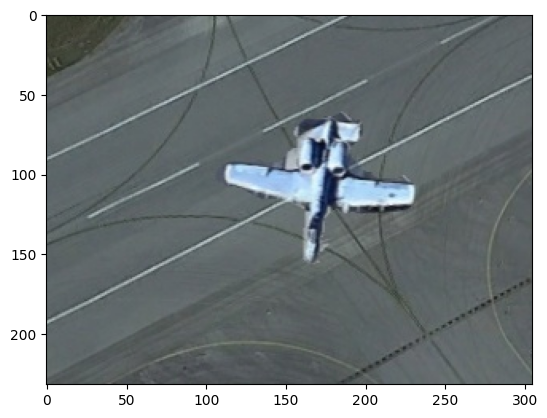

In [6]:
#show an image
plt.imshow(img)

In [7]:
#build our train and test dataset
train_data=ImageDataGenerator().flow_from_directory(train_files_path,target_size=(224,224))
test_data=ImageDataGenerator().flow_from_directory(test_files_path,target_size=(224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [8]:
#classes
numberoftypes=5

In [9]:
#build VGG model
vgg=VGG16()
vgg_layers=vgg.layers
print(vgg_layers)

553467096/553467096 [==============================] - 2s 0us/step
[<keras.engine.input_layer.InputLayer object at 0x7ab70c43e200>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70c3f5000>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70aaae770>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ab70aaafc40>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70aaae9b0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70aaaea10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ab70ab81960>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70ab825f0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70ab81c90>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70ab835e0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ab70ab839d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab70ab81ba0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ab7099bd330>, <keras.layers.convo

In [10]:
vgg_layersize_tobe_used=len(vgg_layers)-1

model=Sequential()
for i in range(vgg_layersize_tobe_used):
    model.add(vgg_layers[i])

In [11]:
for layers in model.layers:
    layers.trainable=False

model.add(Dense(numberoftypes,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
batch_size = 16
steps_per_epoch = len(train_data) // batch_size
validation_steps = len(test_data) // batch_size

model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=20, validation_data=test_data, validation_steps=validation_steps)


<ipython-input-13-1af4193d2573>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=20, validation_data=test_data, validation_steps=validation_steps)


Epoch 1/20
3/3 [==============================] - 26s 9s/step - loss: 3.2341 - accuracy: 0.3958
Epoch 2/20
3/3 [==============================] - 17s 5s/step - loss: 2.3758 - accuracy: 0.4062
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 0.9688 - accuracy: 0.6354
Epoch 4/20
3/3 [==============================] - 14s 4s/step - loss: 0.4683 - accuracy: 0.8542
Epoch 5/20
3/3 [==============================] - 13s 4s/step - loss: 0.4954 - accuracy: 0.8333
Epoch 6/20
3/3 [==============================] - 14s 4s/step - loss: 0.2879 - accuracy: 0.9271
Epoch 7/20
3/3 [==============================] - 12s 5s/step - loss: 0.3937 - accuracy: 0.8542
Epoch 8/20
3/3 [==============================] - 13s 4s/step - loss: 0.2371 - accuracy: 0.9062
Epoch 9/20
3/3 [==============================] - 10s 3s/step - loss: 0.1678 - accuracy: 0.9375
Epoch 10/20
3/3 [==============================] - 12s 3s/step - loss: 0.2321 - accuracy: 0.9375
Epoch 11/20
3/3 [======================

In [14]:
#load image
img=Image.open("/content/drive/MyDrive/a10.jpg").resize((224,224))
img=np.array(img)
img.shape
print(img.ndim)

3


In [15]:
img=img.reshape(-1,224,224,3)
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


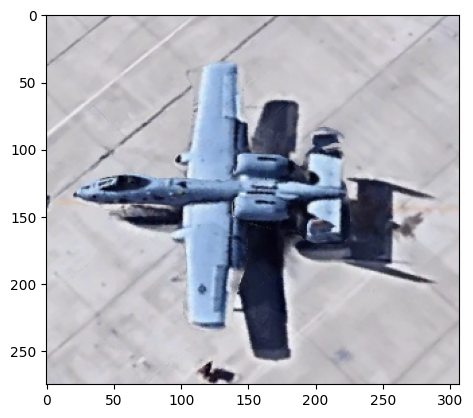

In [16]:
img=preprocess_input(img)
img_for_display=load_img("/content/drive/MyDrive/a10.jpg")
plt.imshow(img_for_display)
plt.show()

In [17]:
#prediction
pred=model.predict(img)
pred

1/1 [==============================] - 0s 277ms/step


array([[0.90677303, 0.0029592 , 0.02657773, 0.04910399, 0.01458597]],
      dtype=float32)

In [18]:
image_classes = ['A-10 Thunderbolt', 'Boeing B-52', 'Boeing E-3 Sentry', 'F-22 Raptor', 'KC-10 Extender']
result=np.argmax(pred[0])
print(image_classes[result])

A-10 Thunderbolt


Görüntü şekli: (224, 224, 3)


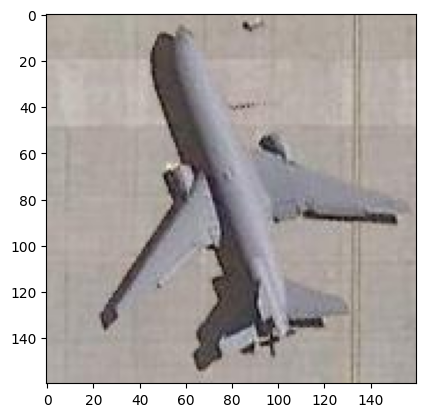

1/1 [==============================] - 0s 108ms/step
KC-10 Extender


In [19]:
img2 = Image.open("/content/drive/MyDrive/McDonnellDouglas_kc10.jpg").resize((224,224))

img2 = np.array(img2)
print("Görüntü şekli:", img2.shape)
img2 = img2.reshape(-1,224,224,3)
img2 = preprocess_input(img2)
img_for_display2 = load_img("/content/drive/MyDrive/McDonnellDouglas_kc10.jpg")
plt.imshow(img_for_display2)
plt.show()
pred = model.predict(img2)
result2 = np.argmax(pred[0])
print(image_classes[result2])

Görüntü şekli: (224, 224, 3)


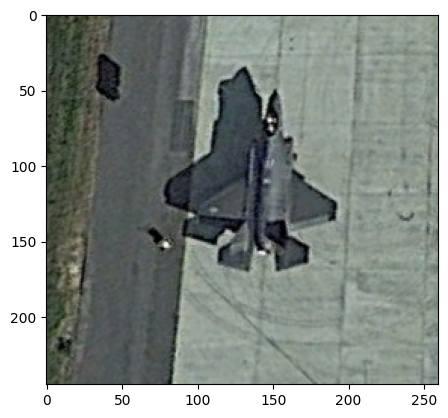

1/1 [==============================] - 0s 108ms/step
F-22 Raptor


In [20]:
img3 = Image.open("/content/drive/MyDrive/f22.jpg").resize((224,224))

img3 = np.array(img3)
print("Görüntü şekli:", img3.shape)
img3 = img3.reshape(-1,224,224,3)
img3 = preprocess_input(img3)
img_for_display3 = load_img("/content/drive/MyDrive/f22.jpg")
plt.imshow(img_for_display3)
plt.show()
pred = model.predict(img3)
result3 = np.argmax(pred[0])
print(image_classes[result3])